# Hyper Parameter Tuning with sklearn (GridSearch)
​
The objective of any learning algorithm $A$ is to find a function $f$ that minimizes some expected loss. A learning algorithm produces $f$ through the optimization of a training criterion with respect to a set of parameters $θ$. Most of the time the actual learning algorithm itself will be having some hyper-parameters. The actual learning algorithm is the one which obtained after choosing lambda. The process is described the below given algorithm. 

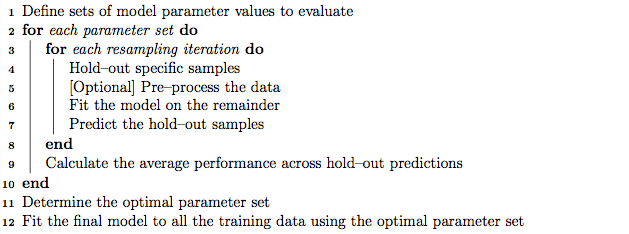

In [1]:
from IPython.display import Image
Image("http://topepo.github.io/caret/TrainAlgo.png")

In this notebook we will discuss how to apply the hyper-parameter tuning with scikit-learn.Let's play with this using the IRIS data-set.

Let's explore.

In [43]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


iris = load_iris()

svc = SVC(kernel="poly")
svo = SVC(kernel="poly").fit(iris.data, iris.target)

parameters = {"C": [1,2,4,8],"kernel": ["poly","rbf"],"degree":[1, 2, 3, 4]}

clf = GridSearchCV(svc, param_grid=parameters,score_func=f1_score,refit=True)

clf.fit(iris.data, iris.target)



print model_tunning.best_score_
print model_tunning.best_params_
print classification_report(iris.target,clf.predict(iris.data))
print classification_report(iris.target,svo.predict(iris.data))


0.986666666667
{'kernel': 'rbf', 'C': 2, 'degree': 1}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.98      0.99        50
          2       0.98      1.00      0.99        50

avg / total       0.99      0.99      0.99       150

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



### What just happened ?
In the above code we are trying to build a classier to classify the IRIS data with Support Vector Machine. We have created two svm objects one is for fitting the entire data without hyper parameter tuning and other for tuning. Then we created a set of parameters. The svm object and parameter is passed to $GridSearchCV$ class for fitting the classifier. After fitting the model we observed that the best estimator give a score of $0.986666666667$ and the best parameters as ${'kernel': 'rbf', 'C': 2, 'degree': 1}$. The classification report says that the tuned classifier gives and F-1 score of $0.99$ and the other produces $0.98$

### Applying pre-processing to the grid
Now lets see how we can apply some pre-processing to the tuning. The one easy way is to pre-process the entire training set and then pass it to the grid. The second option is to pass the pre-processor to the grid. We will try to use the Standard Scalar with IRIS data.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe_line = make_pipeline(StandardScaler(),SVC())

param_grid = {"standardscaler__copy":[True,False],"standardscaler__with_mean":[True,False],\
"standardscaler__with_std":[True,False],"svc__C": [1,2,4,8],"svc__kernel": ["poly","rbf"],\
"svc__degree":[1, 2, 3, 4]}


clf_p = GridSearchCV(pipe_line, param_grid=param_grid,score_func=f1_score,refit=True)

clf_p.fit(iris.data, iris.target)

print clf_p.best_score_
print clf_p.best_params_
print classification_report(iris.target,clf_p.predict(iris.data))


0.986666666667
{'standardscaler__with_mean': True, 'svc__C': 2, 'standardscaler__copy': True, 'svc__degree': 1, 'svc__kernel': 'poly', 'standardscaler__with_std': True}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



### What just happened ?

In the above example we have we have applied the StandardScalar to the data set and applied to the training data. While the cross validated and tuned training in progress, each train and test split will be scaled with the specified parameters. For the grid search we have created a pipe-line. For the pipe line we have created the parameters. Parameter for each item in the pipe-line is specified after name of element name and doube under score like "svc__C". 

The example was all about classifiers. In the same way we can use the GridSearch with any Regressor class available in scikit-learn.

### Clustering with GridSearch

The GridSearch in sklearn supports clustering too. But it won't be having the ".labels_" attribute available. Let's see an example with IRIS data.

In [62]:
from sklearn.cluster import KMeans

kmeans_params = {'n_clusters':[3,6],'init':['k-means++','random'],\
'precompute_distances':[True,False],'random_state':[0,1],'n_init':[5,10]}

kmean_grid = GridSearchCV(KMeans(),kmeans_params,refit=True)

kmean_grid.fit(iris.data)

print kmean_grid.best_score_
print kmean_grid.best_estimator_

-143.81758994
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=5,
    n_jobs=1, precompute_distances=True, random_state=1, tol=0.0001,
    verbose=0)


### Conclusion 
In this note we had a short walk though of how to perform hyper parameter tuning in scikit-learn. Try it and enjoy.

Happy Hacking !!!